<a href="https://colab.research.google.com/github/jessicayung/CarND-Capstone-submit-1/blob/master/advanced-dl-rl/dl/DL_1819_CW1_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Coursework 1

**Student Name:**  Yin Yung (Student Number: 14009057 )

**Start date:** *15th January 2019*

**Due date:** *05th February 2019, 09:00 am*

## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw1.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 


### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We should not have to re-run your code.



# Assignment Description

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).



## The Assignment

### Objectives

Familiarise yourselves with Tensorflow and basic concepts we have covered in the course: like simple neural network models (fully connected models, convolutional networks) and backpropagation.

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

*Hint*: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 
each time evaluate the accuracy of the model both on **20% of the train set** and on **the entire test set**.

### Reporting

For each model `i`, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       ((num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       ((num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       ((num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 3, figsize=(16,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      if test_accuracy != []:
        cell_text[i].append(test_accuracy[-1])
      else:
        print('Warning: Something went wrong! Missing testing/training data')
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

# PART 1: TensorFlow + Simple NN models  (30 pts) 

## Model 1 (5 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [7]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

# Helper variables
input_dim = 784
num_train = 60000
num_test = 10000
num_classes = 10

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  h1_units = 10
  xavier_init = tf.contrib.layers.xavier_initializer()
  weights = {
      'h1': tf.Variable(xavier_init([input_dim, h1_units]))
  }
  biases = {
      'b1': tf.Variable(xavier_init([h1_units]))
  }
  
  output1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=output1, labels=y_))
  optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  train_op = optimiser.minimize(loss_op)
  
  pred = tf.nn.softmax(output1)  # Apply softmax to logits
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  
  init = tf.global_variables_initializer()
  
  # Train.
  # i = batch num
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    # Initialise variables
    sess.run(init)
    
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      sess.run([train_op, loss_op], feed_dict={x: batch_xs, y_: batch_ys})      
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        sess.graph._unsafe_unfinalize()
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        twentypc_xs, twentypc_ys = eval_mnist.train.next_batch(int(num_train*0.2))
        train_acc = accuracy.eval({x: twentypc_xs, y_: twentypc_ys},
                                 session=sess)
        train_accuracy.append(train_acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_acc = accuracy.eval({x: eval_mnist.test.images, y_: eval_mnist.test.labels},
                                session=sess)
        test_accuracy.append(test_acc)

    experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [8]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
num_classes = 10
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  h1_units = 32
  xavier_init = tf.contrib.layers.xavier_initializer()
  weights = {
      'h1': tf.Variable(xavier_init([input_dim, h1_units])),
      'h2': tf.Variable(xavier_init([h1_units, num_classes]))
  }
  biases = {
      'b1': tf.Variable(xavier_init([h1_units])),
      'b2': tf.Variable(xavier_init([num_classes]))
  }
  
  h1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  h1 = tf.nn.relu(h1)
  output = tf.add(tf.matmul(h1, weights['h2']), biases['b2'])
  loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=output, labels=y_))
  optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  train_op = optimiser.minimize(loss_op)
  
  pred = tf.nn.softmax(output)  # Apply softmax to logits
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  
  init = tf.global_variables_initializer()

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run([train_op, loss_op], feed_dict={x: batch_xs, y_: batch_ys})      
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        sess.graph._unsafe_unfinalize()
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        twentypc_xs, twentypc_ys = eval_mnist.train.next_batch(int(num_train*0.2))
        train_acc = accuracy.eval({x: twentypc_xs, y_: twentypc_ys},
                                 session=sess)
        train_accuracy.append(train_acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_acc = accuracy.eval({x: eval_mnist.test.images, y_: eval_mnist.test.labels},
                                session=sess)
        test_accuracy.append(test_acc)

    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [9]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  h1_units = 32
  h2_units = 32
  xavier_init = tf.contrib.layers.xavier_initializer()
  weights = {
      'h1': tf.Variable(xavier_init([input_dim, h1_units])),
      'h2': tf.Variable(xavier_init([h1_units, h2_units])),
      'h3': tf.Variable(xavier_init([h2_units, num_classes]))
  }
  biases = {
      'b1': tf.Variable(xavier_init([h1_units])),
      'b2': tf.Variable(xavier_init([h2_units])),
      'b3': tf.Variable(xavier_init([num_classes]))
  }
  
  h1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  h1 = tf.nn.relu(h1)
  h2 = tf.add(tf.matmul(h1, weights['h2']), biases['b2'])
  h2 = tf.nn.relu(h2)
  output = tf.add(tf.matmul(h2, weights['h3']), biases['b3'])
  loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=output, labels=y_))
  optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  train_op = optimiser.minimize(loss_op)
  
  pred = tf.nn.softmax(output)  # Apply softmax to logits
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  
  init = tf.global_variables_initializer()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run([train_op, loss_op], feed_dict={x: batch_xs, y_: batch_ys})      
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        sess.graph._unsafe_unfinalize()
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        twentypc_xs, twentypc_ys = eval_mnist.train.next_batch(int(num_train*0.2))
        train_acc = accuracy.eval({x: twentypc_xs, y_: twentypc_ys},
                                 session=sess)
        train_accuracy.append(train_acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_acc = accuracy.eval({x: eval_mnist.test.images, y_: eval_mnist.test.labels},
                                session=sess)
        test_accuracy.append(test_acc)

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

# Results

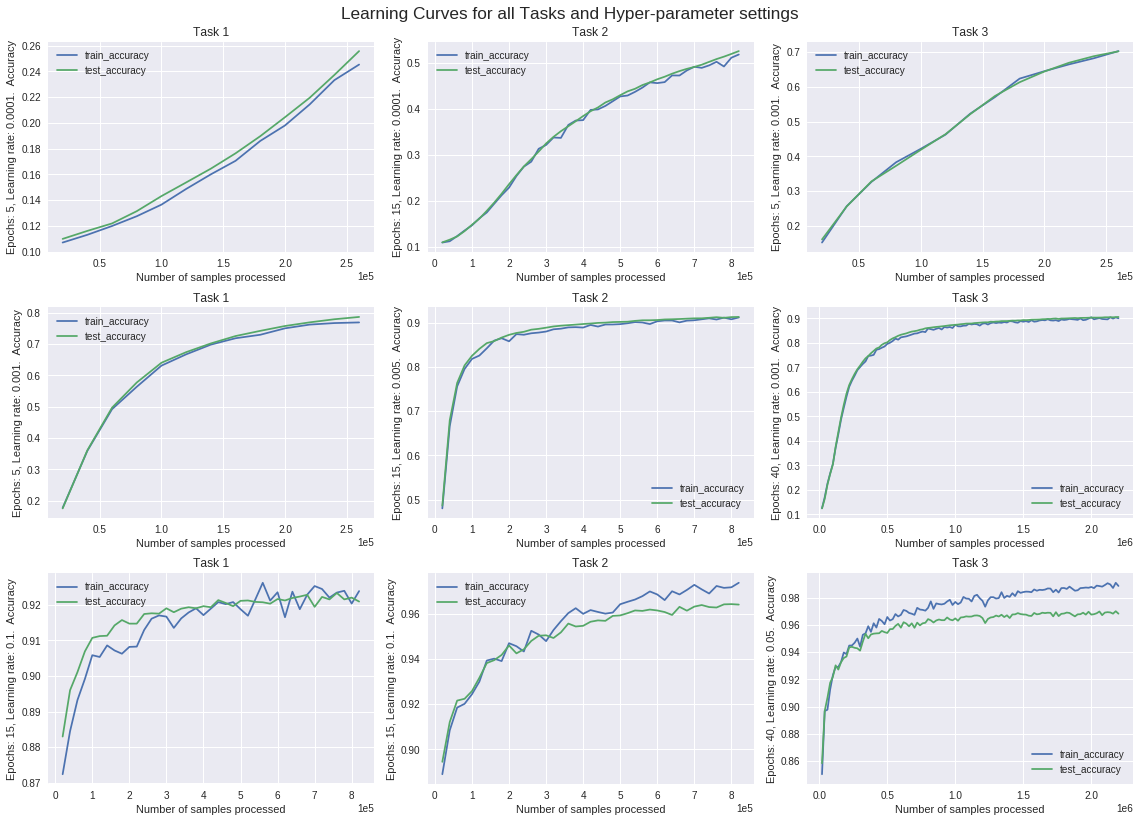

In [10]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3])

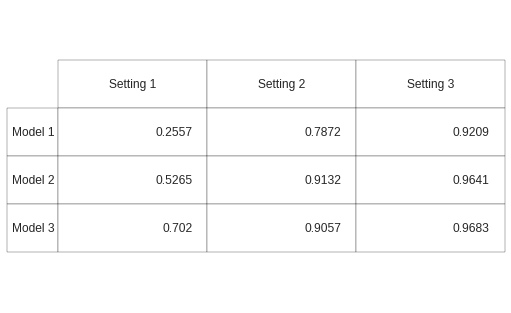

In [11]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3]) 

# Questions

### Q1.1 (3 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Experiment 3 Task 3 is an example of overfitting. We can see this in the 0.02 gap between test and training accuracy. 

This is happening because the model capacity is high (784x32 + 32x32 + 32x10 + 32 + 32 + 10 = 26506 parameters, around 0.5 parameters per example, with a non-linear model) and there are is no regularisation or early stopping when we begin to see overfitting.

### Q1.2 (2 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

Experiment 1 (especially task 1) constitutes an example of under-fitting. The training accuracy does not increase sufficiently, reaching maxima of 0.26, 0.79 and 0.92 respectively. There is next to no gap between the training and test accuracies.

This is because the model has a low capacity (7840 parameters, linear model) and it is being trained for too few epochs (in the case of settisg 1 and 2).

### Q1.3 (2 pts): How would you prevent over-/under-fitting from happening?

To prevent underfitting, I would increase the model capacity, e.g. by increasing the number of units per hidden layer or by increasing the number of hidden layers.

To prevent overfitting, I would stop training the model when the test error starts to increase or when the training accuracy greatly exceeds the test accuracy, reduce the number of hidden units per layer or the number of layers (probably not here) or add regularisers (e.g. by adding dropout layers or L1, L2 norms to weights).

### Q1.4 (8 pts): Pick one model that is over-fitting and implement your proposed fix. Train your model and report your new training/testing curves below. 

I chose to retrain model 3.

I add a dropout layer with keep_prob = 0.8 after each hidden layer and stop training when (train_acc - test_acc) > 0.005 for five (possibly non-consecutive) epochs. Ideally this would be consecutive epochs.

The gap between test and training errors is now much smaller at less than 0.01 vs what seems like more than 0.02 previously (see plots below comparing model 3 and the new model (model 3 v2)).

In [23]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3v2 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

stop = False
train_over_test = 0
keep_prob = 0.7

print('Training Model 3 v2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  h1_units = 32
  h2_units = 32
  xavier_init = tf.contrib.layers.xavier_initializer()
  weights = {
      'h1': tf.Variable(xavier_init([input_dim, h1_units])),
      'h2': tf.Variable(xavier_init([h1_units, h2_units])),
      'h3': tf.Variable(xavier_init([h2_units, num_classes]))
  }
  biases = {
      'b1': tf.Variable(xavier_init([h1_units])),
      'b2': tf.Variable(xavier_init([h2_units])),
      'b3': tf.Variable(xavier_init([num_classes]))
  }
  
  h1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
  h1 = tf.nn.relu(h1)
  h1 = tf.layers.dropout(h1, keep_prob)
  h2 = tf.add(tf.matmul(h1, weights['h2']), biases['b2'])
  h2 = tf.nn.relu(h2)
  h2 = tf.layers.dropout(h2, keep_prob)
  output = tf.add(tf.matmul(h2, weights['h3']), biases['b3'])
  loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
    logits=output, labels=y_))
  optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  train_op = optimiser.minimize(loss_op)
  
  pred = tf.nn.softmax(output)  # Apply softmax to logits
  correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
  # Calculate accuracy
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
  
  init = tf.global_variables_initializer()
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs and not stop:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      sess.run([train_op, loss_op], feed_dict={x: batch_xs, y_: batch_ys})      
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        sess.graph._unsafe_unfinalize()
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        twentypc_xs, twentypc_ys = eval_mnist.train.next_batch(int(num_train*0.2))
        train_acc = accuracy.eval({x: twentypc_xs, y_: twentypc_ys},
                                 session=sess)
        train_accuracy.append(train_acc)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        test_acc = accuracy.eval({x: eval_mnist.test.images, y_: eval_mnist.test.labels},
                                session=sess)
        test_accuracy.append(test_acc)
        
        if train_acc > test_acc + 0.005:
          train_over_test += 1
        if train_over_test > 5:
          stop = True

    experiments_task3v2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3 v2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:ten

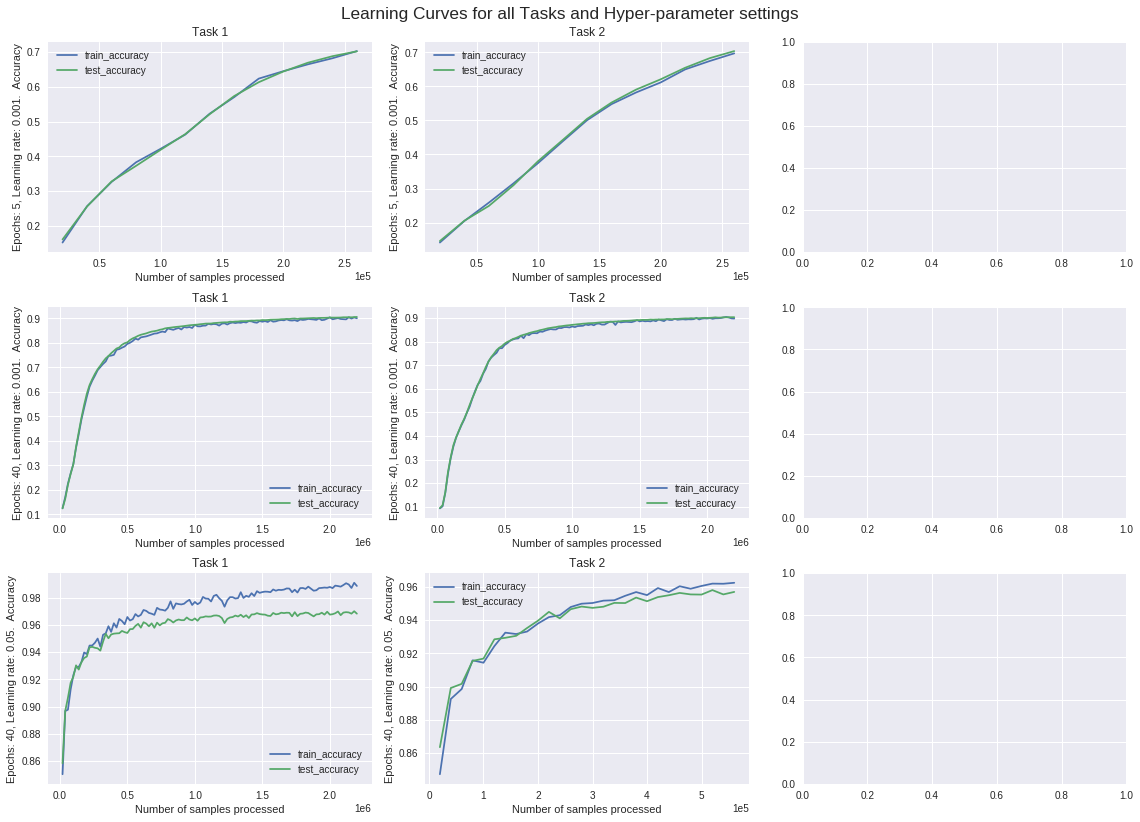

In [24]:
plot_learning_curves([experiments_task3, experiments_task3v2])

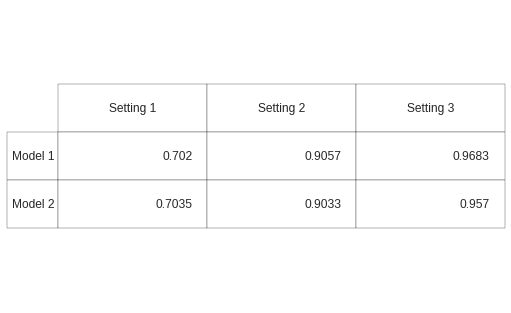

In [25]:
plot_summary_table([experiments_task3, experiments_task3v2]) 

# PART 2:  Backpropagation (35 pts)

### Objectives

This part will be mirroring the first one, but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-3, and described in the corresponding sections of the Colab). This means for each of these models, and the layers they are composed of, you will need to implement:
* **Forward pass**
* **Backward pass**

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. **This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.**

As before, you will train these models to classify hand written digits from the Mnist dataset. 


#### Additional instructions

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take a look at Question 2.1** -- this should help you with the implementations, especially the optimization part.

### Hints

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer activations with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 2.1).


Also from the previous assignment, you should have a good idea of what to expect, both in terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).

## Model 1 (10 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [0]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      
      #################
      # Training step #
      #################
      pass
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        pass

  my_experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [0]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      pass

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        pass

    my_experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [0]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################
      pass

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        pass

    my_experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

# Results

In [0]:
plot_learning_curves([my_experiments_task1, my_experiments_task2, my_experiments_task3])

In [0]:
plot_summary_table([my_experiments_task1, my_experiments_task2, my_experiments_task3])

# Questions

###Q2.1 (15 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

a) [5 pts] Given the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 
$$\frac{\partial loss}{\partial z} = ?$$
*Your answer here*

b) [10 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  $$\frac{\partial loss}{\partial x} = ?$$
  *Your answer here*
  * the parameters of the linear layer: weights $W$ and bias $b$
  $$\frac{\partial loss}{\partial W} = ?$$
  $$\frac{\partial loss}{\partial b} = ?$$
  *Your answer here*
  


# PART 3: Convolution Models (35 pts)



## Model 4 (5 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 

In [0]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

## Model 5 (10 pts): Separable Convolutions

### Separable Convolutions 
The idea behind separable convolutions is very simple. The premise is that if we consider a 2D/3D filter we would want to apply to an input tensor $x$, we could produce a very similar effect by instead applying a series of simpler transformations (in our case convolutions). Doing this would typically end up in less computations and/or fewer parameters (which in a learn). 

**Example 1:** An famous example of such a 2D filter is the Sobel kernel. 
\\begin{equation}
\\begin{bmatrix} 
-1 & 0 & +1 \\\
-2 & 0 & +2 \\\ 
-1 & 0 & +1
\\end{bmatrix} 
=
\\begin{bmatrix} 
1  \\\
2 \\\ 
1 
\\end{bmatrix} \times [-1, 0,1]
\\end{equation}

Thus we can see that this $3 \times 3$ kernel $k$ can be expressed as the dot product  of $3 \times 1$ kernel $k_1$ and $1 \times 3$ kernel $k_2$. The above is a particular example of a spatial separable convolution, but the principle is more generally applicable. And a common model of 'separating' a kernel is essentially separating the normal convolution process in two parts: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a different convolution kernel to every input channel. This will produce an output tensor with the same number of input channels. Then the pointwise convolution will take this intermediate result and apply a $1 \times 1 \times n_{input\_channels}$ kernel to it. As the name suggests this will look individually at every point in the intermediate output. And we will apply as many of these as we need to produce the desired output channels.


**Example 2**: For instance, if we consider a $3\times 3$ convolutional kernel with $16$ input channels and $64$ output channels. The depthwise convolution will be a $3\times 3 \times 16$ kernel (a $3 \times 3$ kernel for each input channel) and the pointwise kernel will be made of $64$ $1\times 1 \times 16$ kernels.

\\

**References and Further Reading:** \\
[Mobilenet](https://arxiv.org/pdf/1704.04861.pdf) \\
[Inception Models](https://arxiv.org/abs/1610.02357) 


### Model 5
3 layer convolutional model, similar to Model 4, but now with separable convolutions + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ separable conv(3x3x8)$\rightarrow$ separable conv(3x3x4) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- No stride. Use max pooling with 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

In [0]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

# Results

In [0]:
plot_learning_curves([experiments_task3, experiments_task4, experiments_task5])

In [0]:
plot_summary_table([experiments_task3, experiments_task4, experiments_task5])

# Questions

### Q3.1 (2 pts): Let's revisit Example 2 above (Sec. Separable Convolutions). Given an input image of $28 \times 28 \times 16$:
* a) What are the dimensions of the result of the depthwise convolution? How many computations were performed in this step? \\
* b) What about the dimension of the output after the pointwise convolution?  How many computations were perfomend in this step? \\
* c) Compare this with applying a normal 2D convolution $3\times 3 \times 64$ to the orginal image. What is the dimensionality of the output? What about the number of computations?

*Your answer here*

### Q3.1 (3 pts): Convolutions vs Separable Convolutions  
* Compare the performance of the two convolutional model vs previous models in Part 1.
* Compare the number of parameters in Model 5 vs Model 4? Explicit computation is required here. 
* Under which conditions could it be advantageous to use separable convolutions instead of normal convolutions?  \\

**Hint:** Think in terms of storage, speed of training, speed of inference, representation power.

*Your answer here*

### Q3.3 (7 pts): Equivalence between 2D convolutions and separable convolutions.

Let's revisit **Example 1** above. Consider a 2D kernel $k$ of dimension $N\times M$ and two 1D kernels: $k_1$, a $1\times N$ and $k_2$, a $1 \times N$ kernel such that $k = k_1^Tk_2$. 
* Prove that the above equality holds, $k = k_1^Tk_2$, applying $k$ to an input signal $x$ is equivalent to applying consecutively the 1D kernels $k_1$ and $k_2$. In which order do these 1D kernels need to be applied for the equivalence to hold?

* Does there always exist such a decomposition? That is, for any 2D kernel $k$, can one find $k_1$ and $k_2$ s.t. $k = k_1^Tk_2$? If so, provide a proof. If not, provide a counter-example.

*Your answer here*

### Q3.4 (8 pts): Based potentially on insights from Q3.3. propose a different separate conv. model that achieves similar performance as Model 4, but has fewer parameters. 

a) Report and justify your choice. 

*Your answer here*

b) Implement, train your model and compare perfomance with Model 4 (setting 3). \\
**Note**:This will likely require a hyperparameter search for the new setting.

*Your answer below*